Downloading...
From: https://drive.google.com/uc?id=17BNgGLbb-sEh_CV4wGnb-GJx2b8qFGKA
To: /content/background-abstract-mosaic-geometry-sketch-ai-eps-png-jpg-svg-ngcloudy.com-4.png
100% 59.0k/59.0k [00:00<00:00, 21.9MB/s]


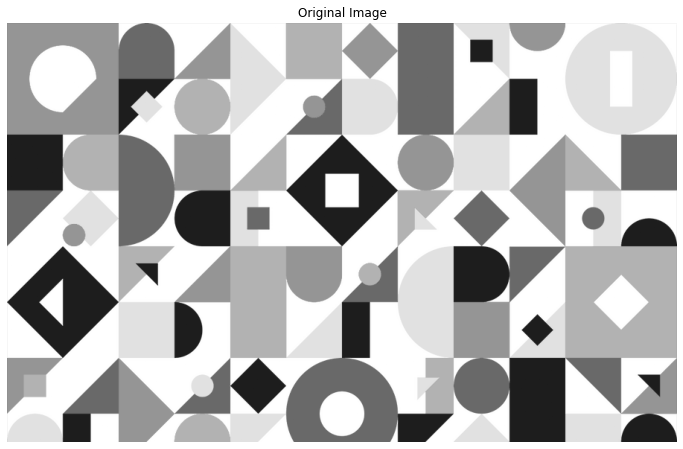

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import math

!gdown --id 17BNgGLbb-sEh_CV4wGnb-GJx2b8qFGKA
filename = './background-abstract-mosaic-geometry-sketch-ai-eps-png-jpg-svg-ngcloudy.com-4.png'
image = cv2.imread(filename, 0)
image1 = image.copy()
# Show image
plt.figure(figsize=(12, 8))
plt.imshow(image, cmap='gray',norm=NoNorm())
plt.title('Original Image')
plt.axis('off')
plt.show()

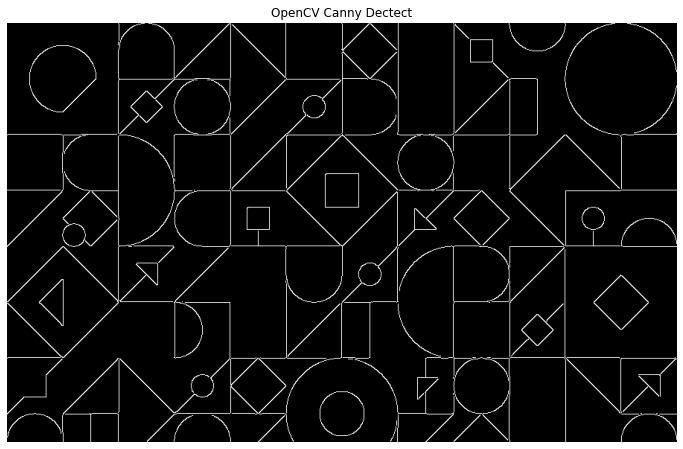

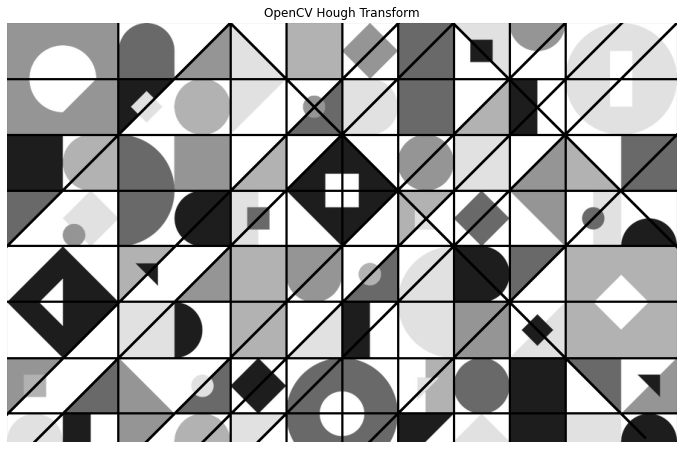

In [2]:
# convert to gray scale
# gray = cv2.cvtColor(filename, cv2.COLOR_BGR2GRAY) # color -> gray
edges = cv2.Canny(image, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=150)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(image,(x1,y1),(x2,y2),(0,0,255),2)    

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(edges, cmap='gray',norm=NoNorm())
plt.title('OpenCV Canny Dectect')
plt.axis('off')
plt.show()

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(image, cmap='gray',norm=NoNorm())
plt.title('OpenCV Hough Transform')
plt.axis('off')
plt.show()

In [3]:
def my_hough(img, rho=1, theta=np.pi/180, threshold=100):
    img_height, img_width = img.shape[:2]
    diagonal_length = int(math.sqrt(img_height*img_height + img_width*img_width))
    
    print('[My Hough] Img Height: %d | Img Width: %d | Img Diagonal Length: %d' % (img_height, img_width, diagonal_length))
    
    num_rho = int(diagonal_length / rho)
    num_theta = int(np.pi / theta)
    
    edge_matrix = np.zeros([2*num_rho+1, num_theta]) 
    
    print('[My Hough] Edge Matrix Dim: %d x %d' % (edge_matrix.shape[0], edge_matrix.shape[1]))
    
    idx	= np.squeeze(cv2.findNonZero(img)) 
    
    range_theta = np.arange(0, np.pi, theta)
    theta_matrix = np.stack((np.cos(np.copy(range_theta)), np.sin(np.copy(range_theta))), axis=-1) 
    
    vote_matrix = np.dot(idx, np.transpose(theta_matrix)) 
    print('[My Hough] Vote Matrix Dim: %d x %d' % (vote_matrix.shape[0], vote_matrix.shape[1]))
    
    for vr in range(vote_matrix.shape[0]):
        for vc in range(vote_matrix.shape[1]):
            rho_pos = int(round(vote_matrix[vr, vc]))+num_rho
            edge_matrix[rho_pos, vc] += 1
    
    print('[My Hough] Sum of Edge Matrix = %d | Max = %d | Min = %d' % (int(np.sum(edge_matrix)), int(np.max(edge_matrix)), int(np.min(edge_matrix))))
    
    line_idx = np.where(edge_matrix > threshold)
    
    rho_values = list(line_idx[0])
    rho_values = [r-num_rho for r in rho_values]
    theta_values = list(line_idx[1])
    theta_values = [t/180.0*np.pi for t in theta_values]
    
    line_idx = list(zip(rho_values, theta_values))
    line_idx = [[li] for li in line_idx]
    return line_idx

[My Hough] Img Height: 563 | Img Width: 900 | Img Diagonal Length: 1061
[My Hough] Edge Matrix Dim: 2123 x 180
[My Hough] Vote Matrix Dim: 18941 x 180
[My Hough] Sum of Edge Matrix = 3409380 | Max = 546 | Min = 0


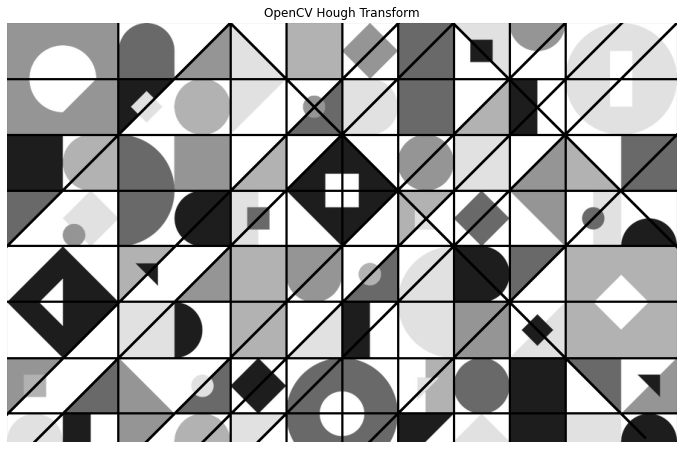

In [4]:
my_lines = my_hough(edges, rho=1, theta=np.pi/180, threshold=150)
for line in my_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(image1,(x1,y1),(x2,y2),(0,0,255),2)    

# Show image
plt.figure(figsize=(12, 8))
plt.imshow(image, cmap='gray',norm=NoNorm())
plt.title('OpenCV Hough Transform')
plt.axis('off')
plt.show()